# 10 minutes to pandas

This is a short introduction to pandas, geared mainly for new users.
You can see more complex recipes in the :ref:`Cookbook<cookbook>`.

Customarily, we import as follows:

In [8]:
import numpy as np
import xdf as pd

Object creation
---------------

See the :ref:`Intro to data structures section <dsintro>`.

Creating a :class:`Series` by passing a list of values, letting pandas create
a default integer index:

In [9]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0     1.0
1     3.0
2     5.0
3    <NA>
4     6.0
5     8.0
dtype: float64

Creating a :class:`DataFrame` by passing a NumPy array, with a datetime index using :func:`date_range`
and labeled columns:

In [10]:
dates = pd.date_range("20130101", periods=6)
dates
df = pd.DataFrame(np.random.randn(6, 4), index=dates, columns=list("ABCD"))

In [11]:
df

,A,B,C,D
2013-01-01,-2.007877,0.269312,1.047672,-0.476510
2013-01-02,-0.091807,0.861670,0.804786,0.594410
2013-01-03,0.254026,-0.791125,0.868380,-0.709333
2013-01-04,0.097712,1.611808,-1.098642,1.539122
2013-01-05,0.277556,0.347104,-0.244899,-1.950336
2013-01-06,-2.154311,0.012174,-1.151179,0.304448


Creating a :class:`DataFrame` by passing a dictionary of objects that can be
converted into a series-like structure:

In [25]:
# This fails because of https://github.com/rapidsai/cudf/issues/12646

# df2 = pd.DataFrame(
#    {
#        "A": 1.0,
#        "B": pd.Timestamp("20130102"),
#        "C": pd.Series(1, index=list(range(4)), dtype="float32"),
#        "D": np.array([3] * 4, dtype="int32"),
#        "E": pd.Categorical(["test", "train", "test", "train"]),
#        "F": "foo",
#    }
# )
# df2

df2 = pd.DataFrame(
   {
       "A": [1.0]*4,
       "B": [pd.Timestamp("20130102")]*4,
       "C": pd.Series([1]*4, dtype="float32"),
       "D": np.array([3] * 4, dtype="int32"),
       "E": pd.Categorical(["test", "train", "test", "train"]),
       "F": ["foo"]*4,
   }
)
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


The columns of the resulting :class:`DataFrame` have different
:ref:`dtypes <basics.dtypes>`:

In [26]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

Viewing data
------------

See the :ref:`Basics section <basics>`.

Use :meth:`DataFrame.head` and :meth:`DataFrame.tail` to view the top and bottom rows of the frame
respectively:

In [27]:
df.head()
df.tail(3)

,A,B,C,D
2013-01-04,0.097712,1.611808,-1.098642,1.539122
2013-01-05,0.277556,0.347104,-0.244899,-1.950336
2013-01-06,-2.154311,0.012174,-1.151179,0.304448


Display the :attr:`DataFrame.index` or :attr:`DataFrame.columns`:

In [28]:
df.index
df.columns

StringIndex(['A' 'B' 'C' 'D'], dtype='object')

:meth:`DataFrame.to_numpy` gives a NumPy representation of the underlying data.
Note that this can be an expensive operation when your :class:`DataFrame` has
columns with different data types, which comes down to a fundamental difference
between pandas and NumPy: **NumPy arrays have one dtype for the entire array,
while pandas DataFrames have one dtype per column**. When you call
:meth:`DataFrame.to_numpy`, pandas will find the NumPy dtype that can hold *all*
of the dtypes in the DataFrame. This may end up being ``object``, which requires
casting every value to a Python object.

For ``df``, our :class:`DataFrame` of all floating-point values, and
:meth:`DataFrame.to_numpy` is fast and doesn't require copying data:

In [29]:
df.to_numpy()

array([[-2.00787745,  0.26931169,  1.04767222, -0.47651031],
       [-0.09180679,  0.86167032,  0.80478571,  0.59440972],
       [ 0.25402554, -0.79112451,  0.86837962, -0.70933307],
       [ 0.09771207,  1.61180781, -1.09864159,  1.53912199],
       [ 0.27755629,  0.3471044 , -0.24489914, -1.95033558],
       [-2.1543108 ,  0.01217427, -1.15117852,  0.30444768]])

For ``df2``, the :class:`DataFrame` with multiple dtypes,
:meth:`DataFrame.to_numpy` is relatively expensive:

In [30]:
df2.to_numpy()

array([[1.0, 1357084800000000000, 1.0, 3, 'test', 'foo'],
       [1.0, 1357084800000000000, 1.0, 3, 'train', 'foo'],
       [1.0, 1357084800000000000, 1.0, 3, 'test', 'foo'],
       [1.0, 1357084800000000000, 1.0, 3, 'train', 'foo']], dtype=object)

:meth:`DataFrame.to_numpy` does *not* include the index or column
labels in the output.

:func:`~DataFrame.describe` shows a quick statistic summary of your data:

In [31]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.604117,0.385157,0.037686,-0.116367
std,1.152599,0.808623,1.008272,1.205627
min,-2.154311,-0.791125,-1.151179,-1.950336
25%,-1.528860,0.076459,-0.885206,-0.651127
50%,0.002953,0.308208,0.279943,-0.086031
75%,0.214947,0.733029,0.852481,0.521919
max,0.277556,1.611808,1.047672,1.539122


Transposing your data:

In [32]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-2.007877,-0.091807,0.254026,0.097712,0.277556,-2.154311
B,0.269312,0.861670,-0.791125,1.611808,0.347104,0.012174
C,1.047672,0.804786,0.868380,-1.098642,-0.244899,-1.151179
D,-0.476510,0.594410,-0.709333,1.539122,-1.950336,0.304448


:meth:`DataFrame.sort_index` sorts by an axis:

In [33]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-0.476510,1.047672,0.269312,-2.007877
2013-01-02,0.594410,0.804786,0.861670,-0.091807
2013-01-03,-0.709333,0.868380,-0.791125,0.254026
2013-01-04,1.539122,-1.098642,1.611808,0.097712
2013-01-05,-1.950336,-0.244899,0.347104,0.277556
2013-01-06,0.304448,-1.151179,0.012174,-2.154311


:meth:`DataFrame.sort_values` sorts by values:

In [34]:
df.sort_values(by="B")

,A,B,C,D
2013-01-03,0.254026,-0.791125,0.868380,-0.709333
2013-01-06,-2.154311,0.012174,-1.151179,0.304448
2013-01-01,-2.007877,0.269312,1.047672,-0.476510
2013-01-05,0.277556,0.347104,-0.244899,-1.950336
2013-01-02,-0.091807,0.861670,0.804786,0.594410
2013-01-04,0.097712,1.611808,-1.098642,1.539122


Selection
---------

.. note::

   While standard Python / NumPy expressions for selecting and setting are
   intuitive and come in handy for interactive work, for production code, we
   recommend the optimized pandas data access methods, :meth:`DataFrame.at`, :meth:`DataFrame.iat`,
   :meth:`DataFrame.loc` and :meth:`DataFrame.iloc`.

See the indexing documentation :ref:`Indexing and Selecting Data <indexing>` and :ref:`MultiIndex / Advanced Indexing <advanced>`.

### Getting


Selecting a single column, which yields a :class:`Series`,
equivalent to ``df.A``:

In [35]:
df["A"]

2013-01-01   -2.007877
2013-01-02   -0.091807
2013-01-03    0.254026
2013-01-04    0.097712
2013-01-05    0.277556
2013-01-06   -2.154311
Name: A, dtype: float64

Selecting via ``[]`` (``__getitem__``), which slices the rows:

In [36]:
df[0:3]
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,-0.091807,0.861670,0.804786,0.594410
2013-01-03,0.254026,-0.791125,0.868380,-0.709333
2013-01-04,0.097712,1.611808,-1.098642,1.539122


### Selection by label

See more in :ref:`Selection by Label <indexing.label>` using :meth:`DataFrame.loc` or :meth:`DataFrame.at`.

For getting a cross section using a label:

In [37]:
df.loc[dates[0]]

A   -2.007877
B    0.269312
C    1.047672
D   -0.476510
Name: 2013-01-01 00:00:00, dtype: float64

In [38]:
df.loc[dates[0]]

A   -2.007877
B    0.269312
C    1.047672
D   -0.476510
Name: 2013-01-01 00:00:00, dtype: float64

Selecting on a multi-axis by label:

In [39]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-2.007877,0.269312
2013-01-02,-0.091807,0.861670
2013-01-03,0.254026,-0.791125
2013-01-04,0.097712,1.611808
2013-01-05,0.277556,0.347104
2013-01-06,-2.154311,0.012174


Showing label slicing, both endpoints are *included*:

In [40]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,-0.091807,0.861670
2013-01-03,0.254026,-0.791125
2013-01-04,0.097712,1.611808


Reduction in the dimensions of the returned object:

In [41]:
df.loc["20130102", ["A", "B"]]

A   -0.091807
B    0.861670
Name: 2013-01-02 00:00:00, dtype: float64

For getting a scalar value:

In [42]:
df.loc[dates[0], "A"]

-2.007877451786815

For getting fast access to a scalar (equivalent to the prior method):

In [43]:
df.at[dates[0], "A"]

-2.007877451786815

### Selection by position

See more in :ref:`Selection by Position <indexing.integer>` using :meth:`DataFrame.iloc` or :meth:`DataFrame.iat`.

Select via the position of the passed integers:

In [44]:
df.iloc[3]

A    0.097712
B    1.611808
C   -1.098642
D    1.539122
Name: 2013-01-04 00:00:00, dtype: float64

By integer slices, acting similar to NumPy/Python:

In [45]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,0.097712,1.611808
2013-01-05,0.277556,0.347104


By lists of integer position locations, similar to the NumPy/Python style:

In [46]:
df.iloc[[1, 2, 4], [0, 2]]

,A,C
2013-01-02,-0.091807,0.804786
2013-01-03,0.254026,0.868380
2013-01-05,0.277556,-0.244899


For slicing rows explicitly:

In [47]:
df.iloc[1:3, :]

,A,B,C,D
2013-01-02,-0.091807,0.861670,0.804786,0.594410
2013-01-03,0.254026,-0.791125,0.868380,-0.709333


For slicing columns explicitly:

In [48]:
df.iloc[:, 1:3]

,B,C
2013-01-01,0.269312,1.047672
2013-01-02,0.861670,0.804786
2013-01-03,-0.791125,0.868380
2013-01-04,1.611808,-1.098642
2013-01-05,0.347104,-0.244899
2013-01-06,0.012174,-1.151179


For getting a value explicitly:

In [49]:
df.iloc[1, 1]

0.861670315323529

For getting fast access to a scalar (equivalent to the prior method):

In [50]:
df.iat[1, 1]

0.861670315323529

### Boolean indexing

Using a single column's values to select data:

In [51]:
df[df["A"] > 0]

,A,B,C,D
2013-01-03,0.254026,-0.791125,0.868380,-0.709333
2013-01-04,0.097712,1.611808,-1.098642,1.539122
2013-01-05,0.277556,0.347104,-0.244899,-1.950336


Selecting values from a DataFrame where a boolean condition is met:

In [52]:
df[df > 0]

,A,B,C,D
2013-01-01,<NA>,0.269311688,1.04767222,<NA>
2013-01-02,<NA>,0.861670315,0.804785712,0.594409716
2013-01-03,0.25402554,<NA>,0.868379616,<NA>
2013-01-04,0.097712067,1.611807807,<NA>,1.539121986
2013-01-05,0.277556289,0.347104399,<NA>,<NA>
2013-01-06,<NA>,0.012174269,<NA>,0.304447683


Using the :func:`~Series.isin` method for filtering:

In [53]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,0.254026,-0.791125,0.868380,-0.709333,two
2013-01-05,0.277556,0.347104,-0.244899,-1.950336,four


### Setting

Setting a new column automatically aligns the data
by the indexes:

In [54]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index=pd.date_range("20130102", periods=6))
s1
df["F"] = s1

Setting values by label:

In [55]:
df.at[dates[0], "A"] = 0

Setting values by position:

In [56]:
df.iat[0, 1] = 0

Setting by assigning with a NumPy array:

In [57]:
df.loc[:, "D"] = np.array([5] * len(df))

The result of the prior setting operations:

In [58]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,1.047672,5.0,<NA>
2013-01-02,-0.091807,0.861670,0.804786,5.0,1.0
2013-01-03,0.254026,-0.791125,0.868380,5.0,2.0
2013-01-04,0.097712,1.611808,-1.098642,5.0,3.0
2013-01-05,0.277556,0.347104,-0.244899,5.0,4.0
2013-01-06,-2.154311,0.012174,-1.151179,5.0,5.0


A ``where`` operation with setting:

In [59]:
# this fails because of https://github.com/rapidsai/cudf/issues/12397

# df2 = df.copy()
# df2[df2 > 0] = -df2
# df2

Missing data
------------

pandas primarily uses the value ``np.nan`` to represent missing data. It is by
default not included in computations. See the :ref:`Missing Data section
<missing_data>`.

Reindexing allows you to change/add/delete the index on a specified axis. This
returns a copy of the data:

In [60]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0] : dates[1], "E"] = 1
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.047672,5.0,<NA>,1.0
2013-01-02,-0.091807,0.861670,0.804786,5.0,1.0,1.0
2013-01-03,0.254026,-0.791125,0.868380,5.0,2.0,<NA>
2013-01-04,0.097712,1.611808,-1.098642,5.0,3.0,<NA>


:meth:`DataFrame.dropna` drops any rows that have missing data:

In [61]:
df1.dropna(how="any")

,A,B,C,D,F,E
2013-01-02,-0.091807,0.86167,0.804786,5.0,1.0,1.0


:meth:`DataFrame.fillna` fills missing data:

In [62]:
df1.fillna(value=5)

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,1.047672,5.0,5.0,1.0
2013-01-02,-0.091807,0.861670,0.804786,5.0,1.0,1.0
2013-01-03,0.254026,-0.791125,0.868380,5.0,2.0,5.0
2013-01-04,0.097712,1.611808,-1.098642,5.0,3.0,5.0


:func:`isna` gets the boolean mask where values are ``nan``:

In [63]:
pd.isna(df1)

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


Operations
----------

See the :ref:`Basic section on Binary Ops <basics.binop>`.

### Stats

Operations in general *exclude* missing data.

Performing a descriptive statistic:

In [64]:
df.mean()

A   -0.269471
B    0.340272
C    0.037686
D    5.000000
F    3.000000
dtype: float64

Same operation on the other axis:

In [65]:
df.mean(1)

2013-01-01    1.511918
2013-01-02    1.514930
2013-01-03    1.466256
2013-01-04    1.722176
2013-01-05    1.875952
2013-01-06    1.341337
dtype: float64

Operating with objects that have different dimensionality and need alignment.
In addition, pandas automatically broadcasts along the specified dimension:

In [66]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
s
df.sub(s, axis="index")

,A,B,C,D,F
2013-01-01,<NA>,<NA>,<NA>,<NA>,<NA>
2013-01-02,<NA>,<NA>,<NA>,<NA>,<NA>
2013-01-03,-0.74597446,-1.791124513,-0.131620384,4.0,1.0
2013-01-04,-2.902287933,-1.388192193,-4.098641589,2.0,0.0
2013-01-05,-4.722443711,-4.652895601,-5.244899136,0.0,-1.0
2013-01-06,<NA>,<NA>,<NA>,<NA>,<NA>


### Apply


:meth:`DataFrame.apply` applies a user defined function to the data:

In [67]:
df.apply(np.cumsum)
df.apply(lambda x: x.max() - x.min())

A    2.431867
B    2.402932
C    2.198851
D    0.000000
F    4.000000
dtype: float64

### Histogramming


See more at :ref:`Histogramming and Discretization <basics.discretization>`.

In [68]:
s = pd.Series(np.random.randint(0, 7, size=10))
s
s.value_counts()

4    4
0    2
6    1
1    1
3    1
5    1
dtype: int32

### String Methods

Series is equipped with a set of string processing methods in the ``str``
attribute that make it easy to operate on each element of the array, as in the
code snippet below. Note that pattern-matching in ``str`` generally uses `regular
expressions <https://docs.python.org/3/library/re.html>`__ by default (and in
some cases always uses them). See more at :ref:`Vectorized String Methods
<text.string_methods>`.

In [69]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5    <NA>
6    caba
7     dog
8     cat
dtype: object

Merge
-----

### Concat

pandas provides various facilities for easily combining together Series and
DataFrame objects with various kinds of set logic for the indexes
and relational algebra functionality in the case of join / merge-type
operations.

See the :ref:`Merging section <merging>`.

Concatenating pandas objects together along an axis with :func:`concat`:

In [70]:
df = pd.DataFrame(np.random.randn(10, 4))
df

,0,1,2,3
0,-1.551022,0.248039,-1.334987,-1.877321
1,-0.696902,-1.062945,0.597524,-0.362204
2,-0.193231,0.809899,-1.196020,0.477917
3,-1.325522,-0.450584,0.999706,0.039921
4,0.364478,-1.117897,0.823660,-2.331857
5,0.129323,-0.102256,-0.730443,-0.370039
6,0.678095,-1.956145,-0.894734,0.935517
7,0.626300,0.131243,0.018077,0.489063
8,-0.575586,0.768648,0.325696,-0.019574
9,0.419619,-1.687796,-0.060705,0.289224


In [71]:
pieces = [df[:3], df[3:7], df[7:]]

pd.concat(pieces)

,0,1,2,3
0,-1.551022,0.248039,-1.334987,-1.877321
1,-0.696902,-1.062945,0.597524,-0.362204
2,-0.193231,0.809899,-1.196020,0.477917
3,-1.325522,-0.450584,0.999706,0.039921
4,0.364478,-1.117897,0.823660,-2.331857
5,0.129323,-0.102256,-0.730443,-0.370039
6,0.678095,-1.956145,-0.894734,0.935517
7,0.626300,0.131243,0.018077,0.489063
8,-0.575586,0.768648,0.325696,-0.019574
9,0.419619,-1.687796,-0.060705,0.289224


.. note::
   Adding a column to a :class:`DataFrame` is relatively fast. However, adding
   a row requires a copy, and may be expensive. We recommend passing a
   pre-built list of records to the :class:`DataFrame` constructor instead
   of building a :class:`DataFrame` by iteratively appending records to it.

### Join


:func:`merge` enables SQL style join types along specific columns. See the :ref:`Database style joining <merging.join>` section.

In [72]:
left = pd.DataFrame({"key": ["foo", "foo"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "foo"], "rval": [4, 5]})
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,foo,1,5
2,foo,2,4
3,foo,2,5


Another example that can be given is:

In [73]:
left = pd.DataFrame({"key": ["foo", "bar"], "lval": [1, 2]})
right = pd.DataFrame({"key": ["foo", "bar"], "rval": [4, 5]})
pd.merge(left, right, on="key")

,key,lval,rval
0,foo,1,4
1,bar,2,5


Grouping
--------

By "group by" we are referring to a process involving one or more of the
following steps:

 - **Splitting** the data into groups based on some criteria
 - **Applying** a function to each group independently
 - **Combining** the results into a data structure

See the :ref:`Grouping section <groupby>`.

In [74]:
df = pd.DataFrame(
   {
       "A": ["foo", "bar", "foo", "bar", "foo", "bar", "foo", "foo"],
       "B": ["one", "one", "two", "three", "two", "two", "one", "three"],
       "C": np.random.randn(8),
       "D": np.random.randn(8),
   }
)
df

,A,B,C,D
0,foo,one,-1.611909,1.180846
1,bar,one,-0.651845,-0.196136
2,foo,two,1.331613,-0.261937
3,bar,three,-0.945523,-1.194889
4,foo,two,0.551002,0.204483
5,bar,two,-0.433770,0.759419
6,foo,one,-0.672954,0.844379
7,foo,three,-0.398820,1.174157


Grouping and then applying the :meth:`~pandas.core.groupby.DataFrameGroupBy.sum` function to the resulting
groups:

In [75]:
df.groupby("A")[["C", "D"]].sum()

,C,D
A,,
bar,-2.031138,-0.631606
foo,-0.801069,3.141928


Grouping by multiple columns forms a hierarchical index, and again we can
apply the :meth:`~pandas.core.groupby.DataFrameGroupBy.sum` function:

In [76]:
df.groupby(["A", "B"]).sum()

C         D
A   B                        
bar one   -0.651845 -0.196136
foo one   -2.284864  2.025225
bar three -0.945523 -1.194889
foo three -0.398820  1.174157
    two    1.882615 -0.057454
bar two   -0.433770  0.759419

Reshaping
---------

See the sections on :ref:`Hierarchical Indexing <advanced.hierarchical>` and
:ref:`Reshaping <reshaping.stacking>`.

### Stack

In [77]:
tuples = list(
   zip(
       ["bar", "bar", "baz", "baz", "foo", "foo", "qux", "qux"],
       ["one", "two", "one", "two", "one", "two", "one", "two"],
   )
)
index = pd.MultiIndex.from_tuples(tuples, names=["first", "second"])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=["A", "B"])
df2 = df[:4]
df2

A         B
first second                    
bar   one    -0.437270  0.168059
      two    -0.156231 -0.891775
baz   one    -1.092922 -1.460876
      two     0.328895 -0.633221

The :meth:`~DataFrame.stack` method "compresses" a level in the DataFrame's
columns:

In [78]:
stacked = df2.stack()
stacked

first  second   
bar    one     A   -0.437270
               B    0.168059
       two     A   -0.156231
               B   -0.891775
baz    one     A   -1.092922
               B   -1.460876
       two     A    0.328895
               B   -0.633221
dtype: float64

With a "stacked" DataFrame or Series (having a :class:`MultiIndex` as the
``index``), the inverse operation of :meth:`~DataFrame.stack` is
:meth:`~DataFrame.unstack`, which by default unstacks the **last level**:

In [79]:
print(stacked.unstack())
print(stacked.unstack(1))
print(stacked.unstack(0))

                     A         B
first second                    
bar   one    -0.437270  0.168059
      two    -0.156231 -0.891775
baz   one    -1.092922 -1.460876
      two     0.328895 -0.633221
              one       two
first                      
bar   A -0.437270 -0.156231
      B  0.168059 -0.891775
baz   A -1.092922  0.328895
      B -1.460876 -0.633221
               bar       baz
second                      
one    A -0.437270 -1.092922
       B  0.168059 -1.460876
two    A -0.156231  0.328895
       B -0.891775 -0.633221


### Pivot tables

See the section on :ref:`Pivot Tables <reshaping.pivot>`.

In [80]:
df = pd.DataFrame(
   {
       "A": ["one", "one", "two", "three"] * 3,
       "B": ["A", "B", "C"] * 4,
       "C": ["foo", "foo", "foo", "bar", "bar", "bar"] * 2,
       "D": np.random.randn(12),
       "E": np.random.randn(12),
   }
)
df

,A,B,C,D,E
0,one,A,foo,0.846145,1.228160
1,one,B,foo,-1.176027,-2.305885
2,two,C,foo,1.115538,-0.131116
3,three,A,bar,0.029013,-0.422236
4,one,B,bar,0.412564,0.220647
5,one,C,bar,0.094212,2.712328
6,two,A,foo,0.774008,-0.338198
7,three,B,foo,-0.295713,-1.137211
8,one,C,foo,-2.239716,-0.553704
9,one,A,bar,-0.530282,0.181492


:func:`pivot_table` pivots a :class:`DataFrame` specifying the ``values``, ``index`` and ``columns``

In [81]:
pd.pivot_table(df, values="D", index=["A", "B"], columns=["C"])

C                 bar           foo
A     B                            
one   A  -0.530281703   0.846144887
      B   0.412564077  -1.176026543
      C   0.094212477  -2.239716339
three A   0.029013267          <NA>
      B          <NA>   -0.29571328
      C   1.504017385          <NA>
two   A          <NA>   0.774007602
      B   0.206642265          <NA>
      C          <NA>   1.115537847

Time series
-----------

pandas has simple, powerful, and efficient functionality for performing
resampling operations during frequency conversion (e.g., converting secondly
data into 5-minutely data). This is extremely common in, but not limited to,
financial applications. See the :ref:`Time Series section <timeseries>`.

In [82]:
rng = pd.date_range("1/1/2012", periods=100, freq="S")
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample("5Min").sum()

2012-01-01    25174
dtype: int64

:meth:`Series.tz_localize` localizes a time series to a time zone:

In [83]:
rng = pd.date_range("3/6/2012 00:00", periods=5, freq="D")
ts = pd.Series(np.random.randn(len(rng)), rng)
ts
ts_utc = ts.tz_localize("UTC")
ts_utc

2012-03-06   -0.478011
2012-03-07    0.572749
2012-03-08   -1.252109
2012-03-09    0.578483
2012-03-10   -0.855968
dtype: float64

:meth:`Series.tz_convert` converts a timezones aware time series to another time zone:

In [84]:
# This fails because cuDF accepts a timezone-aware Index erroneously
# ts_utc.tz_convert("US/Eastern")

Converting between time span representations:

In [85]:
rng = pd.date_range("1/1/2012", periods=5, freq="M")
ts = pd.Series(np.random.randn(len(rng)), index=rng)
print(ts)
ps = ts.to_period()
print(ps)
ps.to_timestamp()

2012-01-31    0.714373
2012-02-29   -1.202965
2012-03-31    0.225332
2012-04-30   -0.712947
2012-05-31    1.254912
dtype: float64
2012-01    0.714373
2012-02   -1.202965
2012-03    0.225332
2012-04   -0.712947
2012-05    1.254912
Freq: M, dtype: float64


2012-01-01    0.714373
2012-02-01   -1.202965
2012-03-01    0.225332
2012-04-01   -0.712947
2012-05-01    1.254912
dtype: float64

Converting between period and timestamp enables some convenient arithmetic
functions to be used. In the following example, we convert a quarterly
frequency with year ending in November to 9am of the end of the month following
the quarter end:

In [86]:
prng = pd.period_range("1990Q1", "2000Q4", freq="Q-NOV")
ts = pd.Series(np.random.randn(len(prng)), prng)
ts.index = (prng.asfreq("M", "e") + 1).asfreq("H", "s") + 9
ts.slow.head()

1990-03-01 09:00    1.566955
1990-06-01 09:00    1.519023
1990-09-01 09:00    0.416835
1990-12-01 09:00   -3.464651
1991-03-01 09:00    1.508838
Freq: H, dtype: float64

Categoricals
------------

pandas can include categorical data in a :class:`DataFrame`. For full docs, see the
:ref:`categorical introduction <categorical>` and the :ref:`API documentation <api.arrays.categorical>`.

In [87]:
df = pd.DataFrame(
    {"id": [1, 2, 3, 4, 5, 6], "raw_grade": ["a", "b", "b", "a", "a", "e"]}
)

Converting the raw grades to a categorical data type:

In [88]:
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

Rename the categories to more meaningful names:

In [89]:
new_categories = ["very good", "good", "very bad"]
df["grade"] = df["grade"].cat.rename_categories(new_categories)

Reorder the categories and simultaneously add the missing categories (methods under :meth:`Series.cat` return a new :class:`Series` by default):

In [90]:
df["grade"] = df["grade"].cat.set_categories(
    ["very bad", "bad", "medium", "good", "very good"]
)
df["grade"]

0    very good
1         good
2         good
3    very good
4    very good
5     very bad
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

Sorting is per order in the categories, not lexical order:

In [91]:
df.sort_values(by="grade")

,id,raw_grade,grade
5,6,e,very bad
1,2,b,good
2,3,b,good
0,1,a,very good
3,4,a,very good
4,5,a,very good


Grouping by a categorical column also shows empty categories:

In [92]:
df.groupby("grade").size()

grade
very bad     1
good         2
very good    3
dtype: int32

Plotting
--------

See the :ref:`Plotting <visualization>` docs.

We use the standard convention for referencing the matplotlib API:

In [93]:
import matplotlib.pyplot as plt

plt.close("all")

The ``plt.close`` method is used to `close <https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.close.html>`__ a figure window:

<AxesSubplot: >

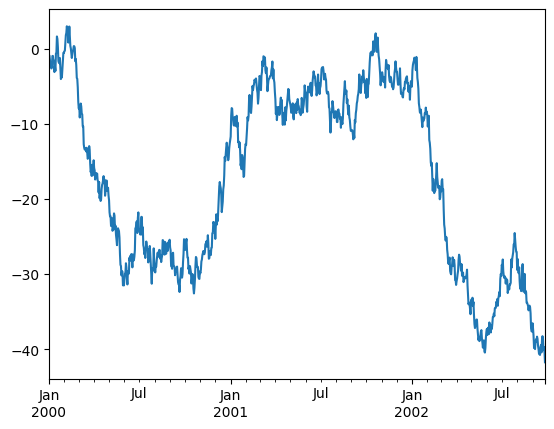

In [94]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()

ts.plot()

If running under Jupyter Notebook, the plot will appear on :meth:`~Series.plot`.  Otherwise use
`matplotlib.pyplot.show <https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.show.html>`__ to show it or
`matplotlib.pyplot.savefig <https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.savefig.html>`__ to write it to a file.

On a DataFrame, the :meth:`~DataFrame.plot` method is a convenience to plot all
of the columns with labels:

<Figure size 640x480 with 0 Axes>

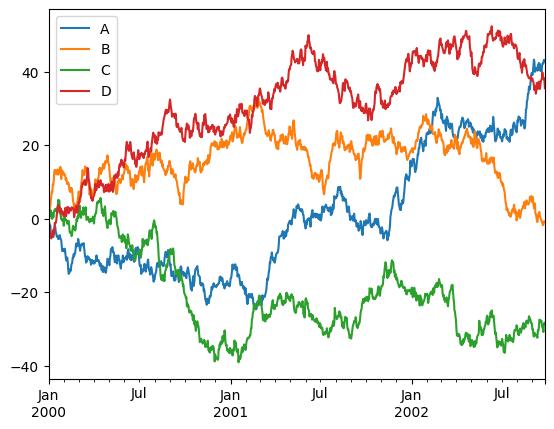

In [95]:
df = pd.DataFrame(
   np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)

df = df.cumsum()

plt.figure();
df.plot();
plt.legend(loc='best');

Importing and exporting data
----------------------------

### CSV

:ref:`Writing to a csv file: <io.store_in_csv>` using :meth:`DataFrame.to_csv`

In [96]:
df.to_csv("foo.csv")

:ref:`Reading from a csv file: <io.read_csv_table>` using :func:`read_csv`

In [97]:
pd.read_csv("foo.csv")

,Unnamed: 0,A,B,C,D
0,2000-01-01T00:00:00.000000000Z,-0.351484,-0.293484,1.103316,-0.421909
1,2000-01-02T00:00:00.000000000Z,-1.545738,0.929087,0.421808,-2.031287
2,2000-01-03T00:00:00.000000000Z,-1.766298,2.514498,1.068526,-3.301596
3,2000-01-04T00:00:00.000000000Z,-1.797551,3.444316,1.953199,-3.442889
4,2000-01-05T00:00:00.000000000Z,-4.510284,5.209300,2.302658,-4.874955
...,...,...,...,...,...
995,2002-09-22T00:00:00.000000000Z,42.330489,-1.751183,-29.735083,38.809000
996,2002-09-23T00:00:00.000000000Z,42.284149,-1.624259,-30.858889,38.277129
997,2002-09-24T00:00:00.000000000Z,43.297397,-0.700341,-28.925130,37.958303
998,2002-09-25T00:00:00.000000000Z,43.086157,-0.865884,-28.319476,38.252561


In [98]:
import os

os.remove("foo.csv")